# Feature Engineering
You should build a machine learning pipeline with a data preprocessing and feature engineering step. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Preprocess the dataset by 
    - removing missing values using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html);
    - normalizing/scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - handling imbalanced classes using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html);
    - and reducing the dimensionality of the dataset using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering methods on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [13]:
# import
import numpy as np
import pandas as pd
from collections import Counter

# load dataset
adult_df =pd.read_csv("../../datasets/adult.csv", na_values='?')

# overview of the dataset
print(adult_df.info())
print("\n")
print(adult_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


   age          workclass  fnlwgt   education  education-num  \
0   39          State-

In [23]:
print("Checking dataframe missing values:\n")

for column in adult_df.columns:
    if adult_df[column].isnull().sum() != 0:
        missingValue = adult_df[column].isnull().sum()
        percentage = missingValue / len(adult_df[column]) * 100
        dtype = adult_df[column].dtype
        print(f"The column: '{column}' with Data Type: '{dtype}' has missing value: {missingValue}, percentage: {percentage:.2f}%")

# memory cleaning
del missingValue
del percentage
del dtype

Checking dataframe missing values:



NameError: name 'missingValue' is not defined

In [19]:
# check the label class and it's distribution percentage
label = adult_df.values[:, -1]
counter = Counter(label)
for key, value in counter.items():
    percentage = value / len(label) * 100
    print(f"Class: {key}, Count = {value}, Percentage = {percentage:.1f}%.")

Class:  <=50K, Count = 24720, Percentage = 75.9%.
Class:  >50K, Count = 7841, Percentage = 24.1%.


In [20]:
numerical_subset = adult_df.select_dtypes(include=['int64', 'float64'])

In [21]:
print(numerical_subset)

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32561 rows x 6 columns]


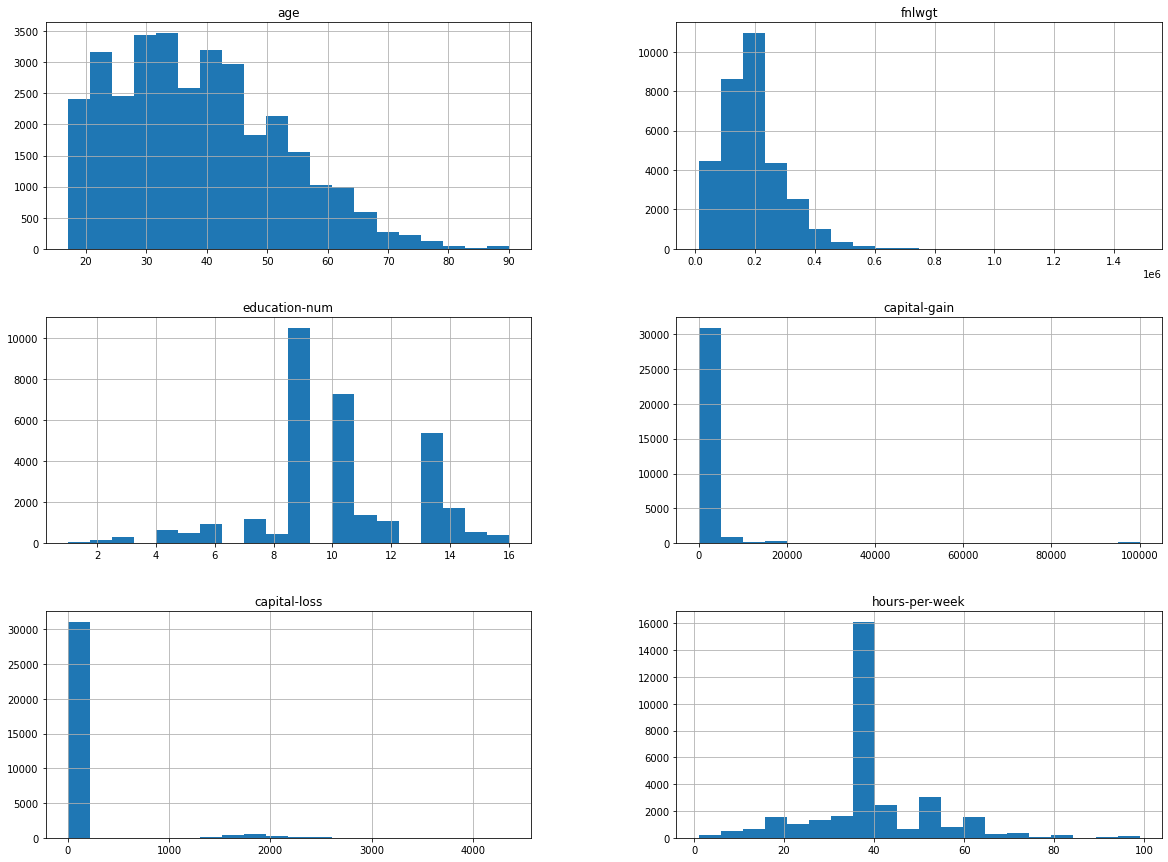

In [22]:
import matplotlib.pyplot as plt
numerical_subset.hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
# use DataFrame `mode()` method
adult_df = adult_df.fillna(adult_df.mode().iloc[0])
print(adult_df.info())

In [ ]:
# checking the outliers
print(numerical_subset.describe())

In [ ]:
# check the quantity of this outlier
print(f"There's {adult_df[adult_df['capital-gain'] == 99999].shape[0]} outlier in the capital-gain column")
print(f"There's {adult_df[adult_df['hours-per-week'] == 99].shape[0]} outlier in the hours-per-week column")

In [ ]:
# replace it with mean value
adult_df['capital-gain'].replace(99999, np.mean(adult_df['capital-gain'].values), inplace=True)
adult_df['hours-per-week'].replace(99, np.mean(adult_df['hours-per-week'].values), inplace=True)
print(adult_df.describe())

In [1]:
import pandas as pd
import sklearn.model_selection
import sklearn.svm
import sklearn.metrics
import sklearn.preprocessing
import sklearn.decomposition

In [2]:
df = pd.read_csv("../../datasets/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [4]:
df = df.dropna()

In [5]:
x = df.drop(["target"], axis=1)
y = df["target"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (24420, 14)
x_test: (8141, 14)


In [6]:
# Building the one-hot encoder model
enc = sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore")
enc.fit(x_train)

# Encoding the categorical attriutes of training data
x_train = enc.transform(x_train)

# Encoding the categorical attriutes of test data
x_test = enc.transform(x_test)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (24420, 18084)
x_test: (8141, 18084)


In [7]:
x_train.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [8]:
model = sklearn.svm.SVC()
model.fit(x_train, y_train);

In [12]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(accuracy)


0.8634074438029726
